In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("Crimes_-_2001_to_Present.csv")

In [4]:
data.shape

(7846809, 22)

In [6]:
print("number of rows:",data.shape[0])
print("number of columns:",data.shape[1])

number of rows: 7846809
number of columns: 22


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [10]:
data.isnull().sum()
data.isnull().sum().sum()

1679689

In [11]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [12]:
df=data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [13]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,11646166,09/01/2018 12:01:00 AM,THEFT,RESIDENCE,False,True
1,11645836,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE,NaN,False,False
2,11449702,07/31/2018 01:30:00 PM,NARCOTICS,STREET,True,False
3,11643334,12/19/2018 04:30:00 PM,CRIMINAL DAMAGE,STREET,False,False
4,11645527,02/02/2015 10:00:00 AM,DECEPTIVE PRACTICE,OTHER,False,False


In [14]:
df.isnull().sum()

ID                          0
Date                        0
Primary Type                0
Location Description    10758
Arrest                      0
Domestic                    0
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [17]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7836051 entries, 0 to 7846808
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 313.9+ MB


Top 10 primary crime types


In [31]:
df['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  1654808
BATTERY                1433691
CRIMINAL DAMAGE         894464
NARCOTICS               748756
ASSAULT                 512775
OTHER OFFENSE           487243
BURGLARY                426108
MOTOR VEHICLE THEFT     382244
DECEPTIVE PRACTICE      339189
ROBBERY                 294604
Name: count, dtype: int64

In [20]:
df['Primary Type'].values

array(['THEFT', 'NARCOTICS', 'CRIMINAL DAMAGE', ...,
       'OFFENSE INVOLVING CHILDREN', 'DECEPTIVE PRACTICE',
       'CRIMINAL TRESPASS'], dtype=object)

# How Many Criminals Are Arrested Having Primary Crime type is Theft?

In [22]:
df['Primary Type']=="THEFT"

0           True
2          False
3          False
4          False
5          False
           ...  
7846804    False
7846805    False
7846806    False
7846807    False
7846808    False
Name: Primary Type, Length: 7836051, dtype: bool

In [23]:
df[df['Primary Type']=="THEFT"]

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,11646166,2018-09-01 00:01:00,THEFT,RESIDENCE,False,True
21,11227293,2017-09-09 20:17:00,THEFT,RESIDENCE,False,False
30,11022695,2017-07-17 10:10:00,THEFT,RESIDENCE,False,False
37,11036284,2017-07-29 15:40:00,THEFT,SIDEWALK,False,False
41,10225582,2015-09-04 20:50:00,THEFT,PARK PROPERTY,False,False
...,...,...,...,...,...,...
7846766,9061796,2013-03-26 03:39:00,THEFT,STREET,False,False
7846769,9157617,2013-06-02 23:00:00,THEFT,RESTAURANT,False,False
7846772,9253833,2013-08-07 14:00:00,THEFT,STREET,False,False
7846776,9354208,2013-10-17 13:30:00,THEFT,APARTMENT,False,False


In [30]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

Arrest
False    1470543
True      184265
Name: count, dtype: int64

# Find The Top 10 Crime Location Descriptions

In [33]:
df['Location Description'].value_counts().head(10)

Location Description
STREET                            2045225
RESIDENCE                         1313506
APARTMENT                          891006
SIDEWALK                           732097
OTHER                              270017
PARKING LOT/GARAGE(NON.RESID.)     202985
ALLEY                              174393
SMALL RETAIL STORE                 148878
SCHOOL, PUBLIC, BUILDING           146387
RESIDENCE-GARAGE                   135543
Name: count, dtype: int64

# How Many of Are Arrested Having Location Type is STREET

In [35]:
df[df['Location Description']=='STREET']['Arrest'].value_counts()

Arrest
False    1488333
True      556892
Name: count, dtype: int64

In [36]:
df.index = pd.DatetimeIndex(df.Date)

In [37]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2018-09-01 00:01:00,11646166,2018-09-01 00:01:00,THEFT,RESIDENCE,False,True
2018-07-31 13:30:00,11449702,2018-07-31 13:30:00,NARCOTICS,STREET,True,False
2018-12-19 16:30:00,11643334,2018-12-19 16:30:00,CRIMINAL DAMAGE,STREET,False,False
2015-02-02 10:00:00,11645527,2015-02-02 10:00:00,DECEPTIVE PRACTICE,OTHER,False,False
2001-01-01 11:00:00,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False
...,...,...,...,...,...,...
2023-06-21 20:00:00,13128007,2023-06-21 20:00:00,CRIMINAL DAMAGE,STREET,False,False
2023-06-20 04:00:00,13129172,2023-06-20 04:00:00,BATTERY,RESIDENCE,False,True
2023-06-06 15:42:00,13128066,2023-06-06 15:42:00,OFFENSE INVOLVING CHILDREN,APARTMENT,False,False


Text(0, 0.5, 'Number of Crimes')

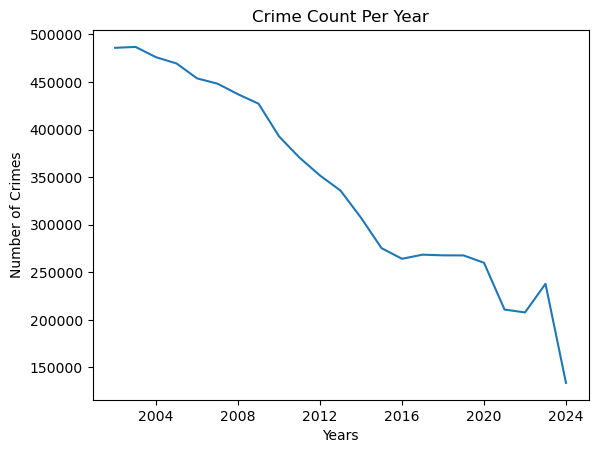

In [38]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

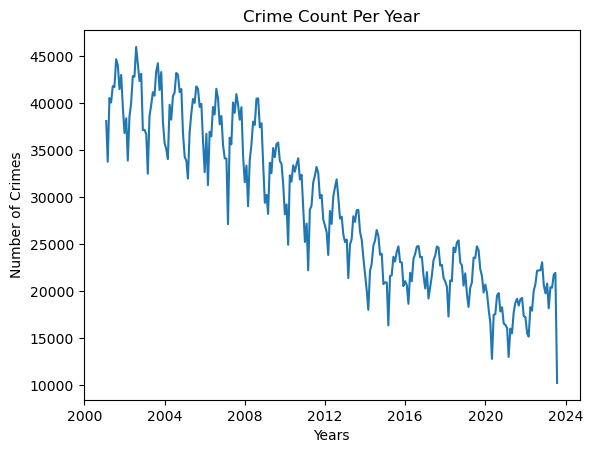

In [41]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

# Preparing The data

In [42]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [43]:
df_prophet.columns=['Date','Crime count']

In [44]:
df_prophet

,Date,Crime count
0,2001-01-31,38119
1,2001-02-28,33786
2,2001-03-31,40564
3,2001-04-30,40091
4,2001-05-31,41839
...,...,...
266,2023-03-31,20431
267,2023-04-30,20371
268,2023-05-31,21763
269,2023-06-30,21956


In [48]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime count':'y'})

In [50]:
df_prophet.head(5)

,ds,y
0,2001-01-31,38119
1,2001-02-28,33786
2,2001-03-31,40564
3,2001-04-30,40091
4,2001-05-31,41839


# Train the model

In [52]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [54]:
from prophet import Prophet

# Train the model

In [55]:
m=Prophet()
m.fit(df_prophet)

22:08:01 - cmdstanpy - INFO - Chain [1] start processing
22:08:02 - cmdstanpy - INFO - Chain [1] done processing


# Make the predictions

In [56]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

In [57]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41753.221304,37032.074675,41066.070887,41753.221304,41753.221304,-2614.704463,-2614.704463,-2614.704463,-2614.704463,-2614.704463,-2614.704463,0.0,0.0,0.0,39138.516841
1,2001-02-28,41693.150756,34410.479306,38528.959074,41693.150756,41693.150756,-5240.401164,-5240.401164,-5240.401164,-5240.401164,-5240.401164,-5240.401164,0.0,0.0,0.0,36452.749592
2,2001-03-31,41626.644078,38495.609931,42705.650803,41626.644078,41626.644078,-1019.686540,-1019.686540,-1019.686540,-1019.686540,-1019.686540,-1019.686540,0.0,0.0,0.0,40606.957538
3,2001-04-30,41562.282777,38128.055180,42354.207018,41562.282777,41562.282777,-1249.272092,-1249.272092,-1249.272092,-1249.272092,-1249.272092,-1249.272092,0.0,0.0,0.0,40313.010686
4,2001-05-31,41495.776100,40814.465289,44963.551320,41495.776100,41495.776100,1394.651424,1394.651424,1394.651424,1394.651424,1394.651424,1394.651424,0.0,0.0,0.0,42890.427524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2025-03-31,17229.630571,14134.282588,18406.376346,17067.729049,17393.671512,-1019.686540,-1019.686540,-1019.686540,-1019.686540,-1019.686540,-1019.686540,0.0,0.0,0.0,16209.944030
291,2025-04-30,17180.196961,13785.202744,18032.505179,17004.939746,17358.096855,-1249.272092,-1249.272092,-1249.272092,-1249.272092,-1249.272092,-1249.272092,0.0,0.0,0.0,15930.924869
292,2025-05-31,17129.115563,16470.081461,20649.754957,16940.371682,17323.905854,1394.651424,1394.651424,1394.651424,1394.651424,1394.651424,1394.651424,0.0,0.0,0.0,18523.766987
293,2025-06-30,17079.681953,16558.207726,20716.885560,16875.441928,17286.129127,1517.290994,1517.290994,1517.290994,1517.290994,1517.290994,1517.290994,0.0,0.0,0.0,18596.972947


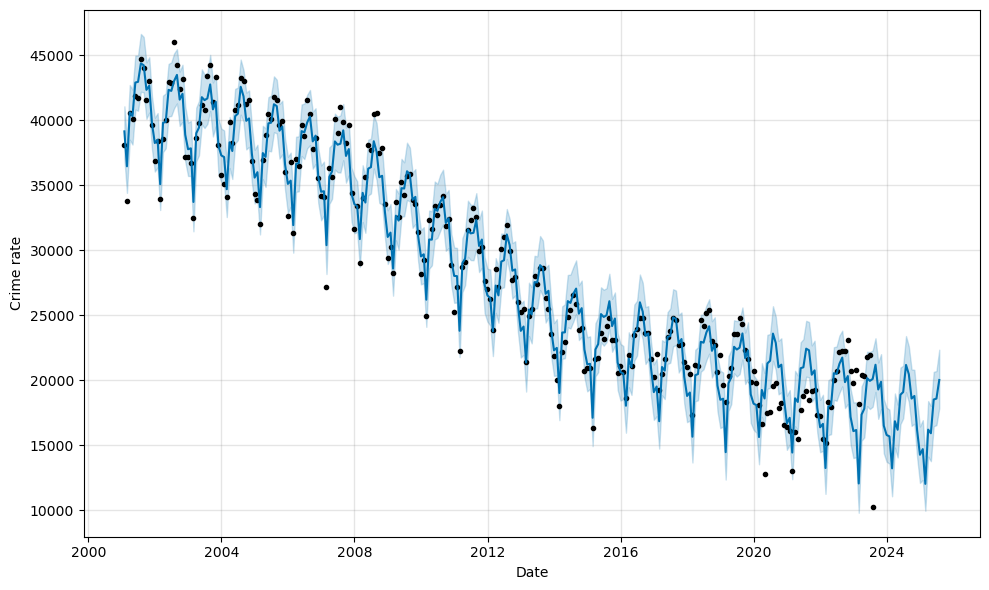

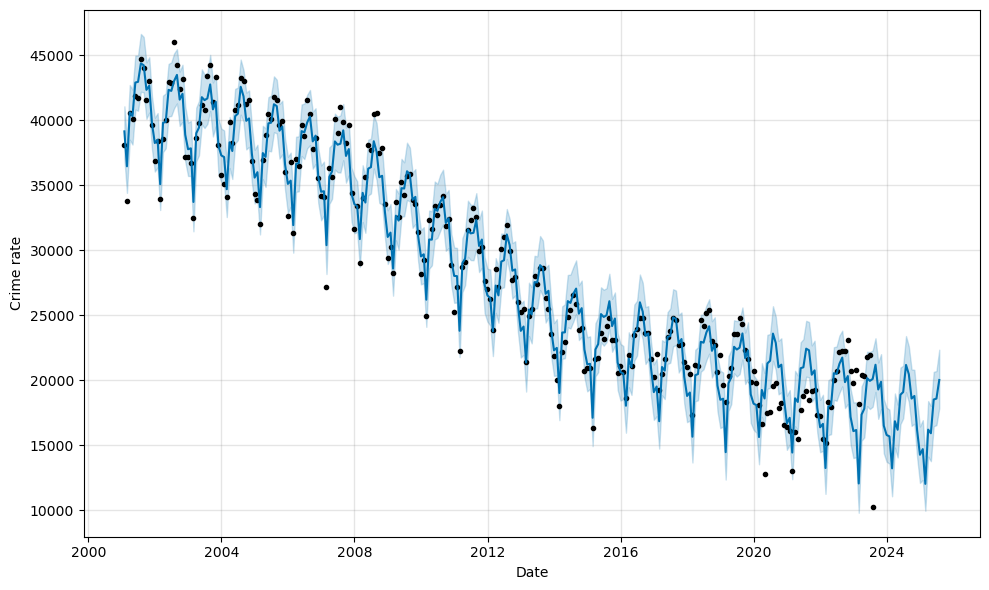

In [58]:
m.plot(forcast,xlabel="Date",ylabel="Crime rate")

# Save model

In [60]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout) 

In [62]:
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))

In [63]:
x=int(input("Enter the months to forecast"))

Enter the months to forecast36


In [73]:
pred=m1.make_future_dataframe(periods=x,freq='M')
forcast = m1.predict(pred)

In [74]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41753.221304,37043.099474,41278.421688,41753.221304,41753.221304,-2614.704463,-2614.704463,-2614.704463,-2614.704463,-2614.704463,-2614.704463,0.0,0.0,0.0,39138.516841
1,2001-02-28,41693.150756,34332.022506,38609.060040,41693.150756,41693.150756,-5240.401164,-5240.401164,-5240.401164,-5240.401164,-5240.401164,-5240.401164,0.0,0.0,0.0,36452.749592
2,2001-03-31,41626.644078,38390.064083,42721.759290,41626.644078,41626.644078,-1019.686540,-1019.686540,-1019.686540,-1019.686540,-1019.686540,-1019.686540,0.0,0.0,0.0,40606.957538
3,2001-04-30,41562.282777,38271.211492,42264.761936,41562.282777,41562.282777,-1249.272092,-1249.272092,-1249.272092,-1249.272092,-1249.272092,-1249.272092,0.0,0.0,0.0,40313.010686
4,2001-05-31,41495.776100,40728.675934,45079.152402,41495.776100,41495.776100,1394.651424,1394.651424,1394.651424,1394.651424,1394.651424,1394.651424,0.0,0.0,0.0,42890.427524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2026-03-31,16628.188313,13368.967230,17918.157612,16254.776727,16973.279207,-1050.573422,-1050.573422,-1050.573422,-1050.573422,-1050.573422,-1050.573422,0.0,0.0,0.0,15577.614891
303,2026-04-30,16578.754703,13535.425742,17771.207701,16182.296203,16939.062223,-909.262448,-909.262448,-909.262448,-909.262448,-909.262448,-909.262448,0.0,0.0,0.0,15669.492255
304,2026-05-31,16527.673306,15864.142438,20384.639210,16106.766030,16915.120083,1618.967771,1618.967771,1618.967771,1618.967771,1618.967771,1618.967771,0.0,0.0,0.0,18146.641077
305,2026-06-30,16478.239696,15939.133253,20163.969516,16036.584687,16881.155685,1602.966955,1602.966955,1602.966955,1602.966955,1602.966955,1602.966955,0.0,0.0,0.0,18081.206650


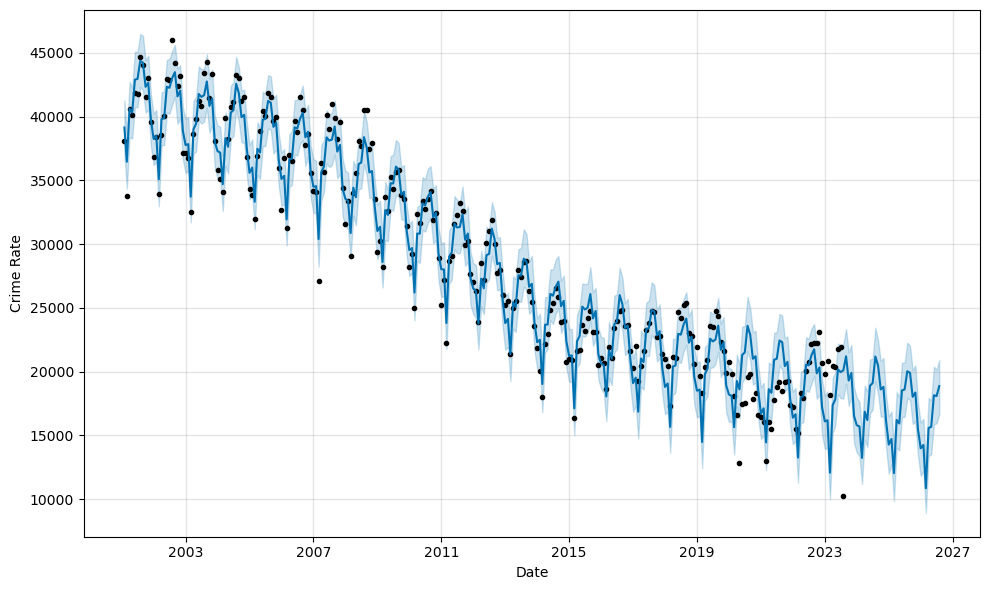

In [75]:
figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')